In [1]:
#analysis using stanford CoreNLP


In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
#standford corenlp python wrapper
from pycorenlp import StanfordCoreNLP
#run th stanford CoreNLP server
#run this command in terminal
#""" java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000"""

In [5]:
#importing dataframe
sentence_df=pd.read_csv("sentence_df.csv")

In [6]:
nlp = StanfordCoreNLP('http://localhost:9000')

In [7]:
import unicodedata

In [8]:
sentence_df['predicted_sentiment']=0
n=0
for i in sentence_df['Sentence']:
    i=unicode(i,'utf-8')
    res=nlp.annotate(unicodedata.normalize('NFKD', i).encode('ascii','ignore'),properties={'annotators':'sentiment','outputFormat':'json'})
    for j in res['sentences']:
         sentence_df.ix[n,'predicted_sentiment']=j['sentimentValue']
    n+=1

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


KeyboardInterrupt: 

In [37]:
sentence_df['predicted_sentiment'].value_counts()

1    1265
3     884
2     642
4     128
0      81
Name: predicted_sentiment, dtype: int64

In [38]:
sentence_df['predicted_sentiment']=sentence_df['predicted_sentiment'].astype('category')

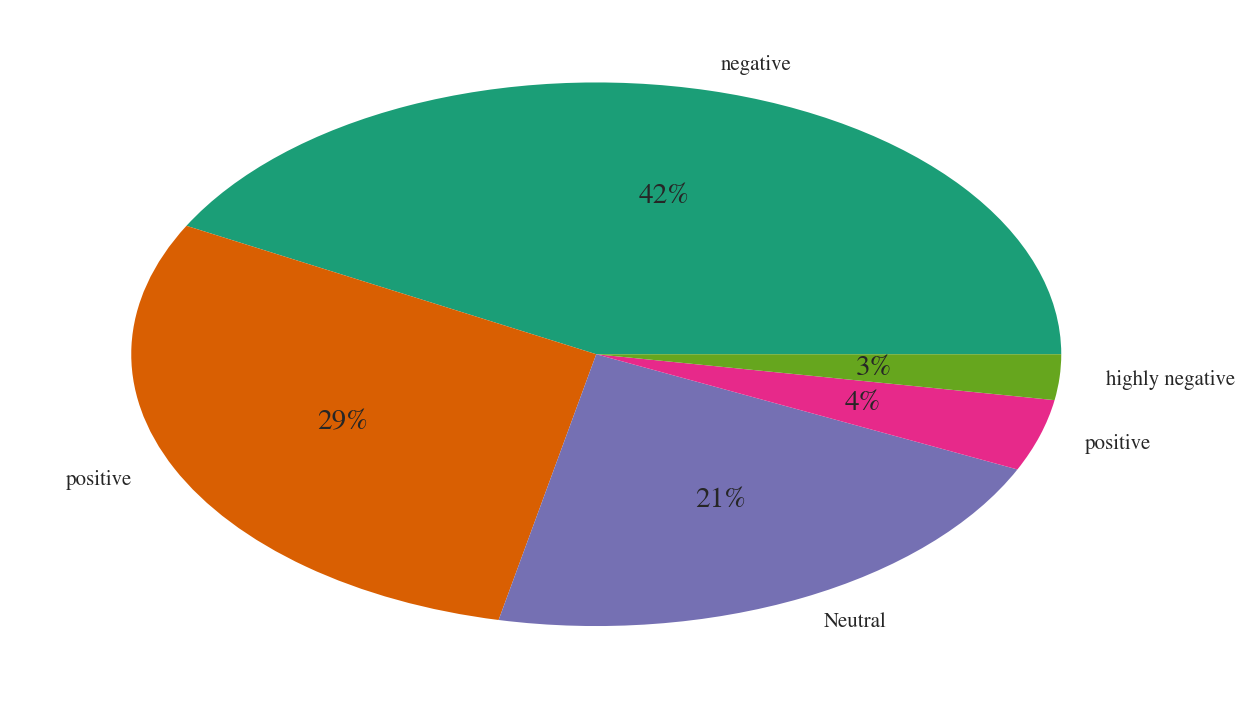

In [41]:
plt.pie(sentence_df['predicted_sentiment'].value_counts(),labels=['negative','positive','Neutral','positive','highly negative'],autopct='%1.0f%%')
plt.show()